<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas scikit-learn seaborn scipy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

In [6]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [59]:
y = df['last_evaluation']
X = df.drop('last_evaluation', axis=1) # переменные для проверки влияния

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   department             14999 non-null  object 
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.0+ MB


In [61]:
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

satisfaction_level: 92 уникальных значений
last_evaluation: 65 уникальных значений
number_project: 6 уникальных значений
average_montly_hours: 215 уникальных значений
time_spend_company: 8 уникальных значений
Work_accident: 2 уникальных значений
promotion_last_5years: 2 уникальных значений
department: 10 уникальных значений
salary: 3 уникальных значений
left: 2 уникальных значений


In [62]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [63]:
X

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,2,157,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,0.80,5,262,6,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,0.11,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,0.72,5,223,5,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,0.37,2,159,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,2,160,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,2,143,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,6,280,4,0,0,1,False,False,False,False,False,False,False,True,False,True,False


In [64]:
df_corr_test = X.copy()

df_corr_test['y'] = y
df_corr_test

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,y
0,0.38,2,157,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False,0.53
1,0.80,5,262,6,0,0,1,False,False,False,False,False,False,True,False,False,False,True,0.86
2,0.11,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False,False,True,0.88
3,0.72,5,223,5,0,0,1,False,False,False,False,False,False,True,False,False,True,False,0.87
4,0.37,2,159,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False,0.57
14995,0.37,2,160,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False,0.48
14996,0.37,2,143,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False,0.53
14997,0.11,6,280,4,0,0,1,False,False,False,False,False,False,False,True,False,True,False,0.96


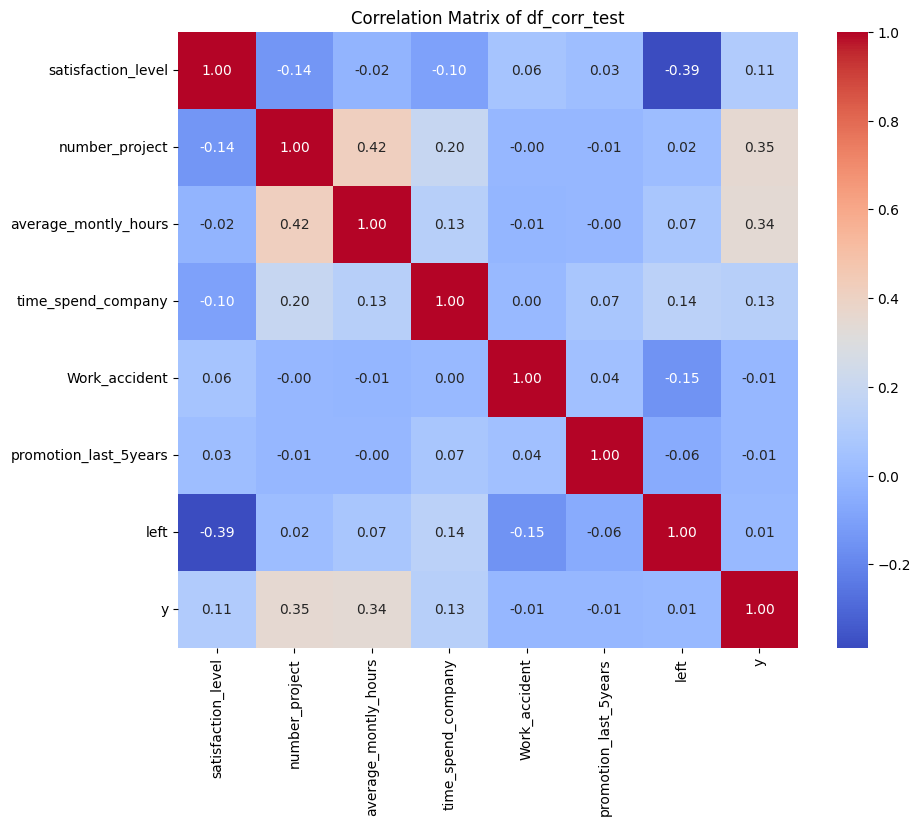

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):

    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [136]:
resolve_regression(X, y)
None

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.20


In [137]:
resolve_regression(X[['number_project', 'average_montly_hours']], y)
None

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.17


In [70]:
X

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,2,157,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,0.80,5,262,6,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,0.11,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,0.72,5,223,5,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,0.37,2,159,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,151,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,2,160,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,2,143,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,6,280,4,0,0,1,False,False,False,False,False,False,False,True,False,True,False


In [84]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [104]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [105]:
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [106]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.20


In [107]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.16


Очевидно, выбираем отбор признаков на основе корреляции

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.20


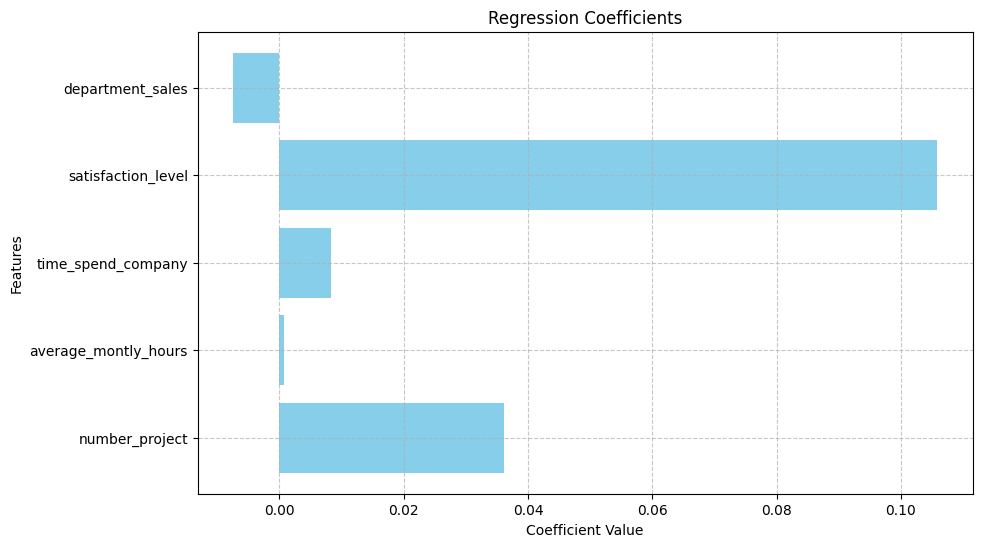

In [112]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_corr, y_selected_corr, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_corr.columns)

In [113]:
# Выбираем числовые признаки
numeric_features = X_selected_corr.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_corr[numeric_features] = scaler.fit_transform(X_selected_corr[numeric_features])

<ipython-input-113-ea2e4eff4cde>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_corr[numeric_features] = scaler.fit_transform(X_selected_corr[numeric_features])


In [114]:
X_selected_corr

,number_project,average_montly_hours,time_spend_company,satisfaction_level,department_sales
0,0.0,0.285047,0.125,0.318681,True
1,0.6,0.775701,0.500,0.780220,True
2,1.0,0.822430,0.250,0.021978,True
3,0.6,0.593458,0.375,0.692308,True
4,0.0,0.294393,0.125,0.307692,True
...,...,...,...,...,...
14994,0.0,0.257009,0.125,0.340659,False
14995,0.0,0.299065,0.125,0.307692,False
14996,0.0,0.219626,0.125,0.307692,False
14997,0.8,0.859813,0.250,0.021978,False


Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.20


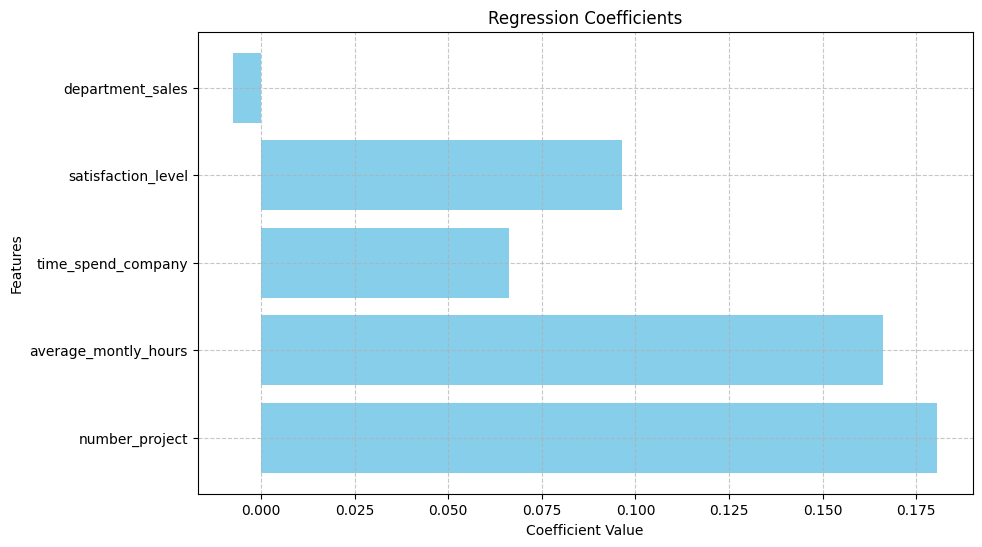

In [115]:
# Выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_corr, y_selected_corr)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_corr.columns)

In [123]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.20


In [124]:
resolve_regression(X, y, regularization='l1')
None

Regularization: l1
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.03
R^2 Score: 0.10


In [125]:
resolve_regression(X, y, regularization='l2')
None

Regularization: l2
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.20


In [126]:
resolve_regression(X, y, regularization=None)
None

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.02
R^2 Score: 0.20


In [183]:
def regression_validation(X, y, regularization=None):

    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train_train, y_train_train)

    # Предсказание
    y_pred = model.predict(X_test)

    y_valid_pred = model.predict(X_validation)

    # Вычисление метрик качества
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    validation_mae = mean_absolute_error(y_validation, y_valid_pred)
    validation_mse = mean_squared_error(y_validation, y_valid_pred)
    validation_r2 = r2_score(y_validation, y_valid_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error Test (MAE): {test_mae:.2f}")
    print(f"Mean Squared Error Test (MSE): {test_mse:.2f}")
    print(f"R^2 Score Test: {test_r2:.2f}")
    print('')
    print(f"Mean Absolute Error Validation (MAE): {validation_mae:.2f}")
    print(f"Mean Squared Error Validation (MSE): {validation_mse:.2f}")
    print(f"R^2 Score Validation: {validation_r2:.2f}")

In [208]:
regression_validation(X, y)
None

Regularization: None
Mean Absolute Error Test (MAE): 0.13
Mean Squared Error Test (MSE): 0.02
R^2 Score Test: 0.16

Mean Absolute Error Validation (MAE): 0.13
Mean Squared Error Validation (MSE): 0.02
R^2 Score Validation: 0.20


In [184]:
regression_validation(X_selected_corr, y_selected_corr)
None # разницы нет, использовать обработанную выборку или изначальную

Regularization: None
Mean Absolute Error Test (MAE): 0.13
Mean Squared Error Test (MSE): 0.02
R^2 Score Test: 0.16

Mean Absolute Error Validation (MAE): 0.13
Mean Squared Error Validation (MSE): 0.02
R^2 Score Validation: 0.20


In [185]:
from sklearn.neighbors import KNeighborsRegressor

def regression_kneighbours(X, y, n_neighbors=None):

    # Разделение данных на тренировочные и тестовые
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Инициализация модели
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train_train, y_train_train)

    # Предсказание
    y_pred = model.predict(X_test)
    y_valid_pred = model.predict(X_validation)

    # Метрики
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    validation_mae = mean_absolute_error(y_validation, y_valid_pred)
    validation_mse = mean_squared_error(y_validation, y_valid_pred)
    validation_r2 = r2_score(y_validation, y_valid_pred)

    # Вывод результатов
    print("Model: KNeighborsRegressor")
    print(f"n_neighbors: {n_neighbors}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Test R^2: {test_r2:.2f}")
    print(f"Validation MAE: {validation_mae:.2f}")
    print(f"Validation MSE: {validation_mse:.2f}")
    print(f"Validation R^2: {validation_r2:.2f}")

In [193]:
regression_kneighbours(X, y, n_neighbors=20)

Model: KNeighborsRegressor
n_neighbors: 20
Test MAE: 0.12
Test MSE: 0.02
Test R^2: 0.22
Validation MAE: 0.12
Validation MSE: 0.02
Validation R^2: 0.26


**Модель KNeighborsRegressor** при предсказывании значений работает лучше, чем линейная регрессия (вне зависимости от регуляризации). Точность абсолютной ошибки на 0,01 меньше, R^2 на 2 сотые больше. В валидационной выборке R^2 на 4 сотые больше. Грубо говоря, модель по ближайшем соседям с нашей выборкой работает чуть лучше. И чем больше соседей мы подаем модели, тем выше становится коэффициент детерминации.

In [194]:
regression_kneighbours(X_selected_corr, y_selected_corr, n_neighbors=20)

Model: KNeighborsRegressor
n_neighbors: 20
Test MAE: 0.12
Test MSE: 0.02
Test R^2: 0.24
Validation MAE: 0.12
Validation MSE: 0.02
Validation R^2: 0.27


Когда мы подаем модели отобранную ранее выборку, коэффициенты R^2 что в тестовой, что в валидационной становятся больше.

In [188]:
from sklearn.tree import DecisionTreeRegressor

def regression_tree(X, y, max_depth=None):

    # Разделение данных на тренировочные и тестовые
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Инициализация модели
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train_train, y_train_train)

    # Предсказание
    y_pred = model.predict(X_test)
    y_valid_pred = model.predict(X_validation)

    # Метрики
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    validation_mae = mean_absolute_error(y_validation, y_valid_pred)
    validation_mse = mean_squared_error(y_validation, y_valid_pred)
    validation_r2 = r2_score(y_validation, y_valid_pred)

    # Вывод результатов
    print("Model: DecisionTreeRegressor")
    print(f"max_depth: {max_depth}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Test R^2: {test_r2:.2f}")
    print(f"Validation MAE: {validation_mae:.2f}")
    print(f"Validation MSE: {validation_mse:.2f}")
    print(f"Validation R^2: {validation_r2:.2f}")

In [205]:
regression_tree(X, y, max_depth=9)

Model: DecisionTreeRegressor
max_depth: 9
Test MAE: 0.12
Test MSE: 0.02
Test R^2: 0.25
Validation MAE: 0.11
Validation MSE: 0.02
Validation R^2: 0.27


**Модель DecisionTreeRegressor** аналогично модели ближайших соседей работает  лучше. Абсолютная ошибка так же на сотую меньше, однако коэффициенты R^2 в среднем по тестовой и валидационной выборке выше. При этом наиболее эффективная глубина дерева - 9. При увеличении этого параметра модель перестает обучаться.

In [206]:
regression_tree(X_selected_corr, y_selected_corr, max_depth=9)

Model: DecisionTreeRegressor
max_depth: 9
Test MAE: 0.12
Test MSE: 0.02
Test R^2: 0.22
Validation MAE: 0.12
Validation MSE: 0.02
Validation R^2: 0.24


А здесь, наоборот, модель становится незначительно, но хуже начальной.